In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Introduction

## 1.1 Business Problem

FLO, an online footwear retailer, is seeking to categorize its customers and formulate marketing strategies tailored to these segments. To achieve this goal, customer behaviors will be defined, and groups will be established based on clustering within these behaviors.

## 1.2 Dataset Story

The dataset consists of information obtained from the historical shopping behaviors of customers who engaged in OmniChannel (both online and offline shopping) for their latest purchases from FLO during the years 2020-2021.

## 1.3 Features

- `master_id` - Unique customer identifier
- `order_channel` - Indication of the platform used for shopping (Android, iOS, Desktop, Mobile)
- `last_order_channel` - The channel used for the most recent purchase
- `first_order_date` - Date of the customer's initial purchase
- `last_order_date` - Date of the customer's most recent purchase
- `last_order_date_online` - Date of the customer's last online purchase
- `last_order_date_offline` - Date of the customer's last offline purchase
- `order_num_total_ever_online` - Total number of purchases made online by the customer
- `order_num_total_ever_offline` - Total number of purchases made offline by the customer
- `customer_value_total_ever_offline` - Total amount spent by the customer in offline purchases
- `customer_value_total_ever_online` - Total amount spent by the customer in online purchases
- `interested_in_categories_12` - List of categories in which the customer has made purchases in the last 12 months

# 2. Data Handling

## 2.1 Loading Data

In [2]:
# Load the dataset
customers = pd.read_csv('flo_data_20k.csv')

In [3]:
# Display the first few rows
customers.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[WOMEN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[MEN, KIDS, WOMEN, SPORTSWEAR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[MEN, WOMEN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[KIDS_SPORTSWEAR, KIDS]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[SPORTSWEAR]


## 2.2 Inspecting Data

In [4]:
# Display basic statistics about the dataset
customers.describe()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
count,19945.000000,19945.000000,19945.000000,19945.000000
mean,3.110855,1.913913,253.922597,497.321690
std,4.225647,2.062880,301.532853,832.601886
min,1.000000,1.000000,10.000000,12.990000
25%,1.000000,1.000000,99.990000,149.980000
50%,2.000000,1.000000,179.980000,286.460000
75%,4.000000,2.000000,319.970000,578.440000
max,200.000000,109.000000,18119.140000,45220.130000


In [5]:
# Display information about the dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [6]:
# Identify columns with null values
customers.isnull().any()

master_id                            False
order_channel                        False
last_order_channel                   False
first_order_date                     False
last_order_date                      False
last_order_date_online               False
last_order_date_offline              False
order_num_total_ever_online          False
order_num_total_ever_offline         False
customer_value_total_ever_offline    False
customer_value_total_ever_online     False
interested_in_categories_12          False
dtype: bool

In [7]:
# Get the number of unique values in each column
customers.nunique()

master_id                            19945
order_channel                            4
last_order_channel                       5
first_order_date                      2465
last_order_date                        366
last_order_date_online                1743
last_order_date_offline                738
order_num_total_ever_online             57
order_num_total_ever_offline            32
customer_value_total_ever_offline     6097
customer_value_total_ever_online     11292
interested_in_categories_12             32
dtype: int64

## 2.3 Data Cleaning and Preprocessing

In [8]:
# Calculate total order numbers and customer values
customers['order_num_total'] = customers['order_num_total_ever_online'] + customers['order_num_total_ever_offline']
customers['customer_value_total'] = customers['customer_value_total_ever_online'] + customers[
    'customer_value_total_ever_offline']

In [9]:
# Convert number of order columns to int format
num_order_cols = customers.columns[customers.columns.str.contains('order_num')]
customers[num_order_cols] = customers[num_order_cols].astype(int)

# Convert date columns to datetime format
date_cols = customers.columns[customers.columns.str.contains('date')]
customers[date_cols] = customers[date_cols].apply(pd.to_datetime)

# Check conversion
customers[num_order_cols.append(date_cols)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   order_num_total_ever_online   19945 non-null  int64         
 1   order_num_total_ever_offline  19945 non-null  int64         
 2   order_num_total               19945 non-null  int64         
 3   first_order_date              19945 non-null  datetime64[ns]
 4   last_order_date               19945 non-null  datetime64[ns]
 5   last_order_date_online        19945 non-null  datetime64[ns]
 6   last_order_date_offline       19945 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(3)
memory usage: 1.1 MB


In [10]:
# Set analysis date
analysis_date = customers['last_order_date'].max() + pd.Timedelta(days=7)

In [11]:
# Calculate RFM metrics
rfm = customers.groupby('master_id').agg(
    {'last_order_date': lambda last_order_date: (analysis_date - last_order_date).dt.days,
     'order_num_total': 'sum',
     'customer_value_total': 'sum'})

# Drop index
rfm.reset_index(inplace=True)

# Rename columns
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

In [12]:
# Calculate RFM scores
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, [5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, [1, 2, 3, 4, 5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, [1, 2, 3, 4, 5])

# Combine RF scores
rfm['rf_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

In [13]:
segment_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_lose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

segments = ['hibernating', 'at_risk', 'cant_lose', 'about_to_sleep', 'need_attention', 'loyal_customers', 'promising',
            'new_customers', 'potential_loyalists', 'champions']

# Map RFM scores to customer segments
rfm['segment'] = rfm['rf_score'].replace(segment_map, regex=True)

In [14]:
def categorize_columns(df, cat_th=10, high_card_th=20):
    """
    Categorizes columns in a DataFrame based on specified thresholds.

    Parameters:
    - df: DataFrame
    - cat_thresh: Threshold for considering a column as categorical (default is 10)
    - high_card_thresh: Threshold for considering a categorical column as having high cardinality (default is 20)

    Returns:
    - cat_cols: List of categorical columns
    - num_cols: List of numerical columns
    - high_card_cat_cols: List of categorical columns with high cardinality
    """

    # Identify categorical columns with high cardinality
    high_card_cols = [col for col in df.columns if
                      df[col].dtype in ["category", "object"] and df[col].nunique() > high_card_th]

    # Identify numerical columns that are treated as categorical
    num_but_cat_cols = [col for col in df.columns if
                        df[col].dtype in ["float64", "int64"] and df[col].nunique() < cat_th]

    # Identify categorical columns
    cat_cols = [col for col in df.columns if
                (df[col].dtype in ["category", "object", "bool"] and col not in high_card_cols) or
                (col in num_but_cat_cols)]

    # Identify numerical columns
    num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in cat_cols]

    # Print dataset overview
    print(f"Dataset Overview:")
    print(f" - Total Columns: {df.shape[1]}")
    print(f" - Numerical Columns: {len(num_cols)}")
    print(f" - Numerical Columns Treated as Categorical: {len(num_but_cat_cols)}")
    print(f" - Categorical Columns: {len(cat_cols)}")
    print(f" - Columns with High Cardinality: {len(high_card_cols)}")

    return cat_cols, num_cols, high_card_cols


# Categorize columns of the dataset
cat_cols, num_cols, high_card_cols = categorize_columns(rfm)

Dataset Overview:
 - Total Columns: 9
 - Numerical Columns: 3
 - Numerical Columns Treated as Categorical: 0
 - Categorical Columns: 4
 - Columns with High Cardinality: 2


# 3. Data Viusalization 

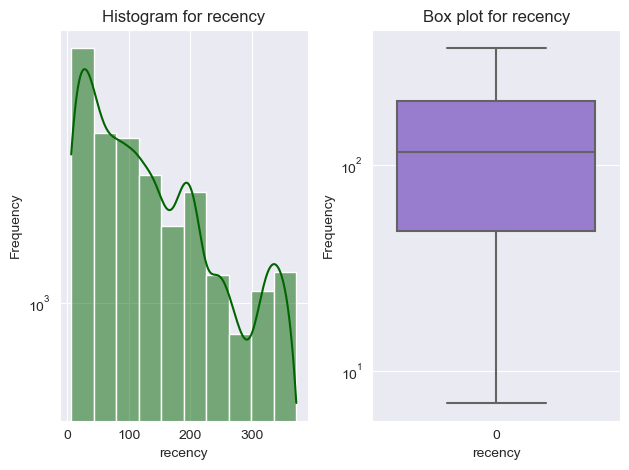

18     205
11     179
20     177
191    174
19     171
      ... 
286     13
289     13
232     12
302      9
310      7
Name: recency, Length: 366, dtype: int64


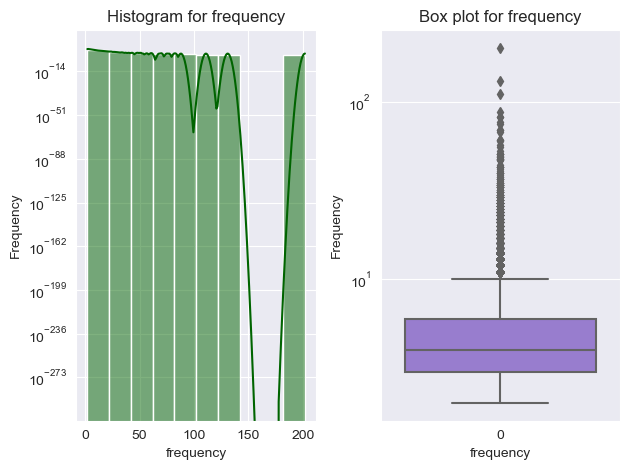

2     4717
3     4377
4     3127
5     2145
6     1515
      ... 
53       1
77       1
83       1
39       1
88       1
Name: frequency, Length: 63, dtype: int64


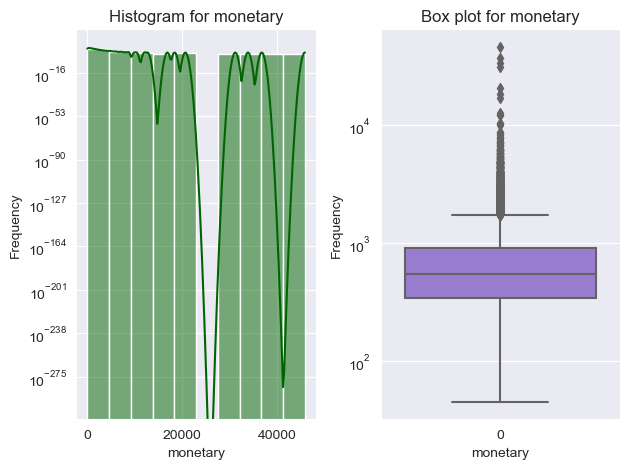

249.98     23
149.98     21
169.98     21
159.98     20
239.98     19
           ..
567.32      1
301.73      1
1147.82     1
1115.11     1
524.69      1
Name: monetary, Length: 16277, dtype: int64


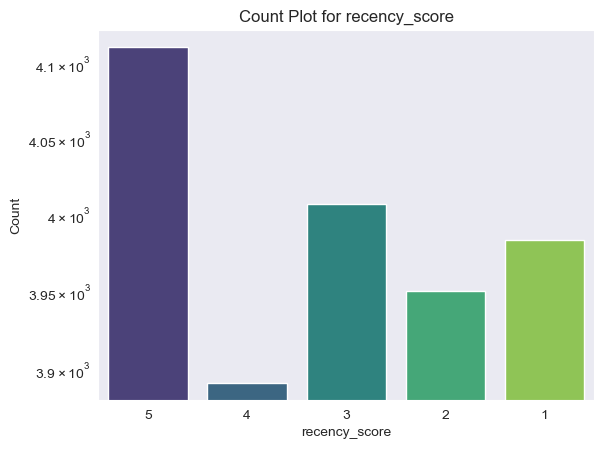

5    4111
3    4007
1    3984
2    3951
4    3892
Name: recency_score, dtype: int64


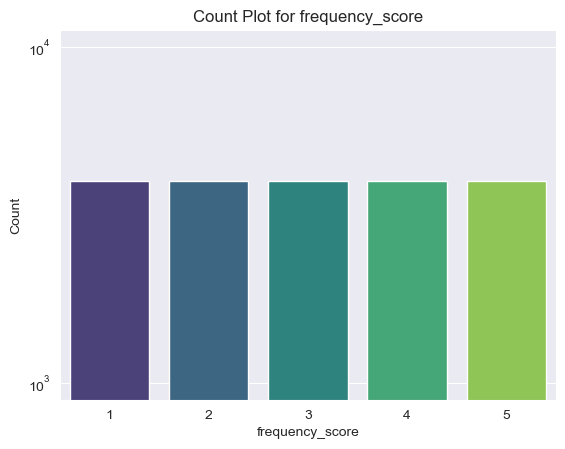

1    3989
2    3989
3    3989
4    3989
5    3989
Name: frequency_score, dtype: int64


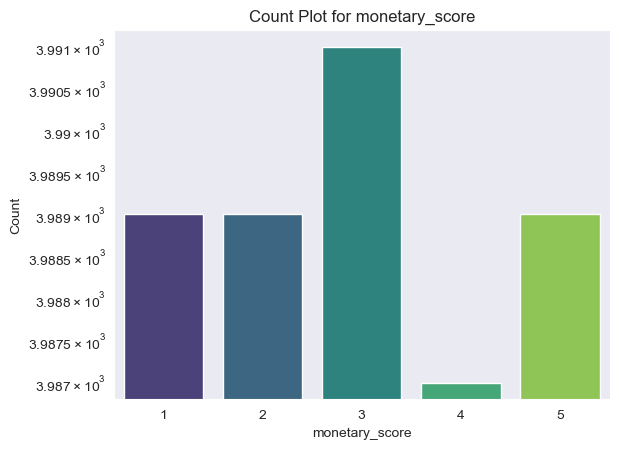

3    3991
1    3989
2    3989
5    3989
4    3987
Name: monetary_score, dtype: int64


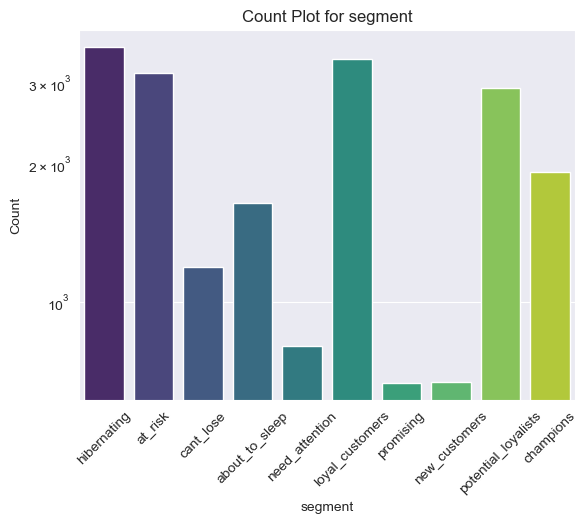

hibernating            3589
loyal_customers        3375
at_risk                3152
potential_loyalists    2925
champions              1920
about_to_sleep         1643
cant_lose              1194
need_attention          806
new_customers           673
promising               668
Name: segment, dtype: int64


In [15]:
def summary_plots(df, num_cols=None, cat_cols=None, log_scale=False):
    """
    Generate summary plots for numerical and categorical columns in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - num_cols (list, optional): List of numerical column names. Defaults to None.
    - cat_cols (list, optional): List of categorical column names. Defaults to None.
    """

    # Plot histograms and box plots for numerical columns
    if num_cols is not None:
        for col in num_cols:
            # Create subplots for histograms and boxplots
            fig, axes = plt.subplots(1, 2)

            # Histogram
            sns.histplot(df[col], bins=10, kde=True, color='darkgreen', ax=axes[0])
            axes[0].set_title(f'Histogram for {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')
            axes[0].set_yscale('log') if log_scale == True else _

            # Box plot
            sns.boxplot(df[col], color='mediumpurple', ax=axes[1])
            axes[1].set_title(f'Box plot for {col}')
            axes[1].set_xlabel(col)
            axes[1].set_ylabel('Frequency')
            axes[1].set_yscale('log') if log_scale == True else _

            # Adjust layout
            plt.tight_layout()

            # Show the plots
            plt.show()

            # Display the counts of unique values in the column
            print(df[col].value_counts())

    # Plot count plots for categorical columns
    if cat_cols is not None:
        for col in cat_cols:
            sns.countplot(x=col, data=df, order=segments, palette='viridis') if col == 'segment' else sns.countplot(
                x=col, data=df, palette='viridis')
            plt.title(f'Count Plot for {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45) if df[col].nunique() >= 10 else _
            plt.yscale('log') if log_scale == True else _

            # Show the plots
            plt.show()

            # Display the counts of unique values in the column
            print(df[col].value_counts())


# Generate summary plots for numerical and categorical columns
summary_plots(rfm, num_cols, cat_cols, log_scale=True)

# 4. Data Analysis

In [16]:
# Calculate mean RFM metrics by segment
rfm.groupby('segment')[['recency', 'frequency', 'monetary']].agg('mean')

,recency,frequency,monetary
segment,,,
about_to_sleep,119.031649,2.406573,361.649373
at_risk,247.328997,4.470178,648.325038
cant_lose,240.159129,10.716918,1481.652446
champions,22.142187,8.965104,1410.708938
hibernating,252.426303,2.391474,362.583299
loyal_customers,87.557926,8.356444,1216.257224
need_attention,118.037221,3.739454,553.436638
new_customers,22.976226,2.000000,344.049495
potential_loyalists,41.869744,3.310769,533.741344


FLO is introducing a new women's footwear brand into its collection. The product prices of this new brand surpass the general customer preferences. Consequently, there is an interest in reaching out to a specific group of customers for the promotion and sales of these products. The targeted customers are envisioned to be loyal patrons, particularly those who frequently purchase from the women's category.

In [17]:
loyal_customers = rfm[rfm['segment'].isin(['champions', 'loyal_customers'])]['customer_id']
female_cat_customers = customers[customers['interested_in_categories_12'].str.contains('WOMEN')]['master_id']
loyal_female_cat_customers = loyal_customers[loyal_customers.isin(female_cat_customers)]

# Extract related customers
loyal_female_cat_customers

3        000c1fe2-a8b7-11ea-8479-000d3a38a36f
18       003903e0-abce-11e9-a2fc-000d3a38a36f
22       004bec18-9f7a-11e9-a2fc-000d3a38a36f
25       00534fe4-a6b4-11e9-a2fc-000d3a38a36f
49       009293fe-1f3e-11ea-87bf-000d3a38a36f
                         ...                 
19931    ffd73136-b098-11e9-9757-000d3a38a36f
19932    ffdd5eb8-aee9-11e9-a2fc-000d3a38a36f
19936    ffe5c7e8-ee12-11e9-9346-000d3a38a36f
19939    ffefdd18-77ca-11ea-9b70-000d3a38a36f
19943    fffacecc-ddc3-11e9-a848-000d3a38a36f
Name: customer_id, Length: 2487, dtype: object

A 40% discount is scheduled for Men's and Children's products. The initiative aims to specifically target customers who have been valued in the past, particularly those who have not engaged in shopping for an extended period, as well as new customers expressing interest in these discounted categories.

In [18]:
cl_h_n_customers = rfm[rfm['segment'].isin(['cant_lose', 'hibernating', 'new_customers'])]['customer_id']
male_kids_cat_customers = \
    customers[customers['interested_in_categories_12'].str.contains('MEN') | customers[
        'interested_in_categories_12'].str.contains(
        'KIDS')][
        'master_id']
cl_h_n_male_kids_cat_customers = cl_h_n_customers[cl_h_n_customers.isin(male_kids_cat_customers)]

# Extract related customers
cl_h_n_customers

1        00034aaa-a838-11e9-a2fc-000d3a38a36f
5        00136ce2-a562-11e9-a2fc-000d3a38a36f
9        0022f41e-5597-11eb-9e65-000d3a38a36f
11       00263f1a-210a-11ea-b50a-000d3a38a36f
16       0033f078-7359-11ea-92d0-000d3a38a36f
                         ...                 
19907    ff839e5e-1fdd-11ea-87bf-000d3a38a36f
19922    ffc47e38-003d-11eb-8341-000d3a38a36f
19926    ffce3990-26be-11ea-aaaa-000d3a38a36f
19929    ffd1553a-1ed0-11ea-81ff-000d3a38a36f
19937    ffe7e6e4-5bb9-11ea-a4ac-000d3a38a36f
Name: customer_id, Length: 5456, dtype: object